# STEP1: Dataset Examination

The German Credit (Statlog) Dataset, It
contains 1, 000 instances, each represented by 9 features such as age, sex, credit history, and job stability.
The dataset includes 700 instances labeled as ”good credit” and 300 instances labeled as ”bad credit”. The
goal is to predict whether a given loan applicant is likely to have good or bad credit based on the available
features

In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\ALIM\\Downloads\\german_credit_data.csv") # change this for you 
print(df)


      id  Age     Sex  Job Housing Saving accounts Checking account  \
0      0   67    male    2     own             NaN           little   
1      1   22  female    2     own          little         moderate   
2      2   49    male    1     own          little              NaN   
3      3   45    male    2    free          little           little   
4      4   53    male    2    free          little           little   
..   ...  ...     ...  ...     ...             ...              ...   
995  995   31  female    1     own          little              NaN   
996  996   40    male    3     own          little           little   
997  997   38    male    2     own          little              NaN   
998  998   23    male    2    free          little           little   
999  999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0             1169         6             radio/TV  good  
1             5951        48   

 Clean the data

In [2]:
df.isnull().sum()
df = df.dropna()
#df = df.fillna(df.mean())
display(df)

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
display(df.describe(include='all'))


,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,522.000000,522.000000,522,522.000000,522,522,522,522.000000,522.000000,522,522
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,354,NaN,349,412,245,NaN,NaN,173,291
mean,493.522989,34.888889,NaN,1.875479,NaN,NaN,NaN,3278.745211,21.339080,NaN,NaN
std,291.131014,11.787918,NaN,0.682811,NaN,NaN,NaN,2929.155177,12.474079,NaN,NaN
min,1.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,276.000000,6.000000,NaN,NaN
25%,233.500000,26.000000,NaN,2.000000,NaN,NaN,NaN,1297.500000,12.000000,NaN,NaN
50%,502.500000,31.500000,NaN,2.000000,NaN,NaN,NaN,2326.500000,18.000000,NaN,NaN
75%,736.750000,41.000000,NaN,2.000000,NaN,NaN,NaN,3971.250000,26.750000,NaN,NaN


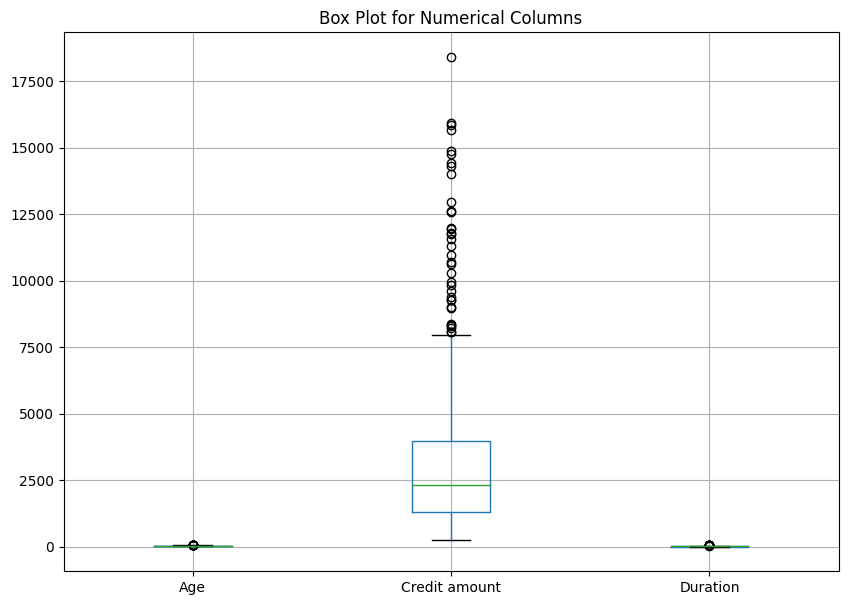

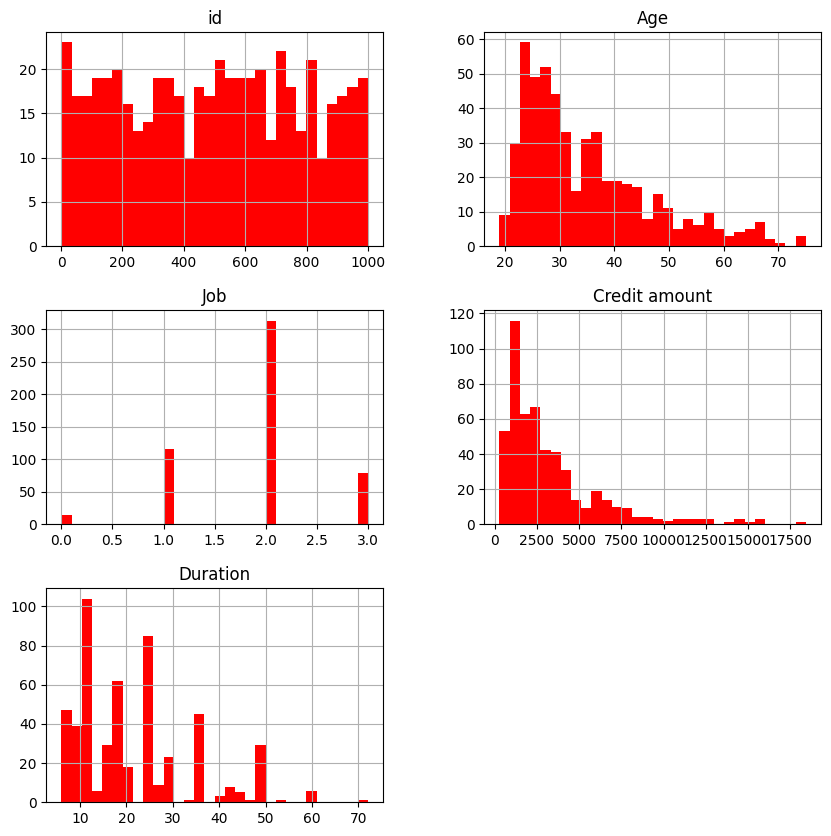

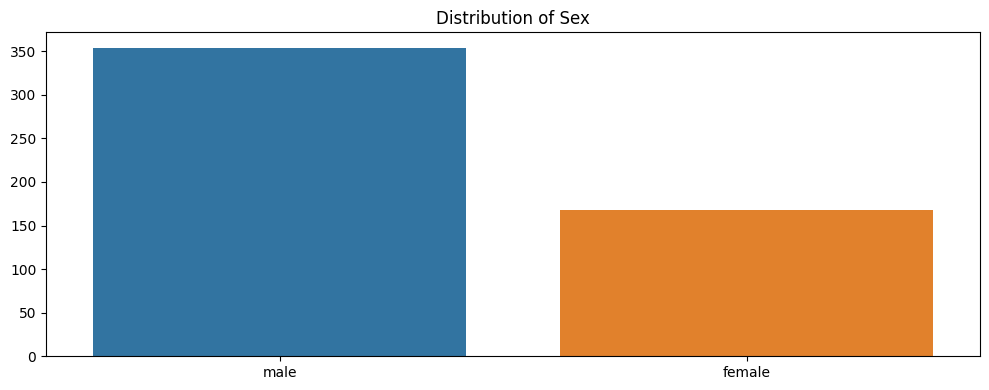

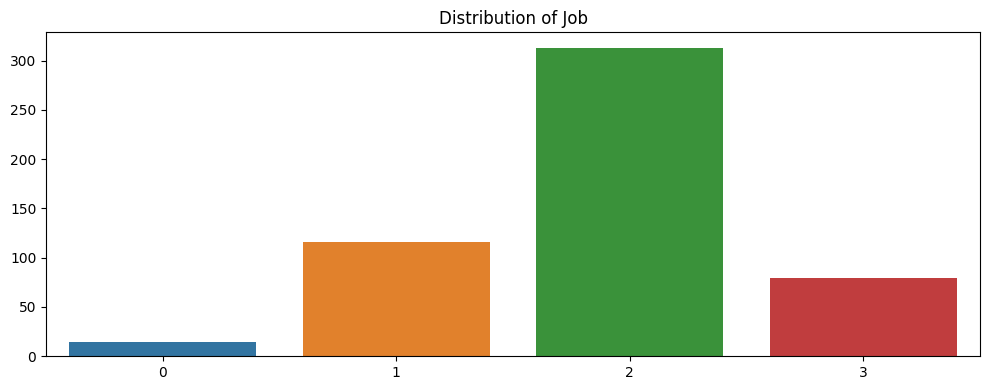

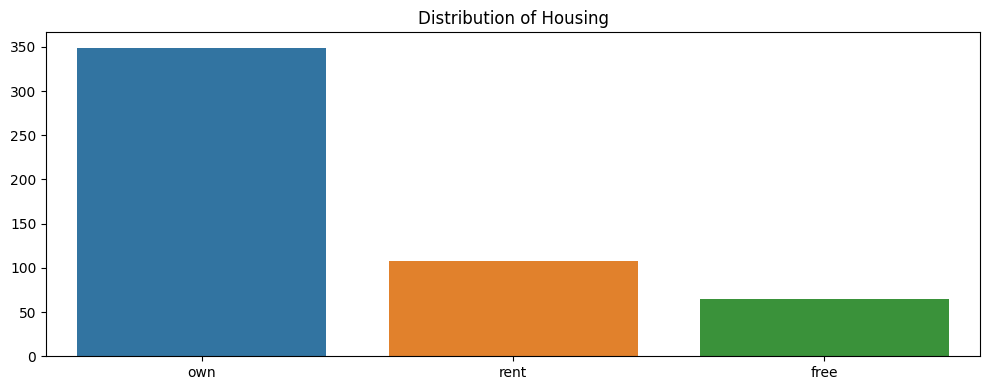

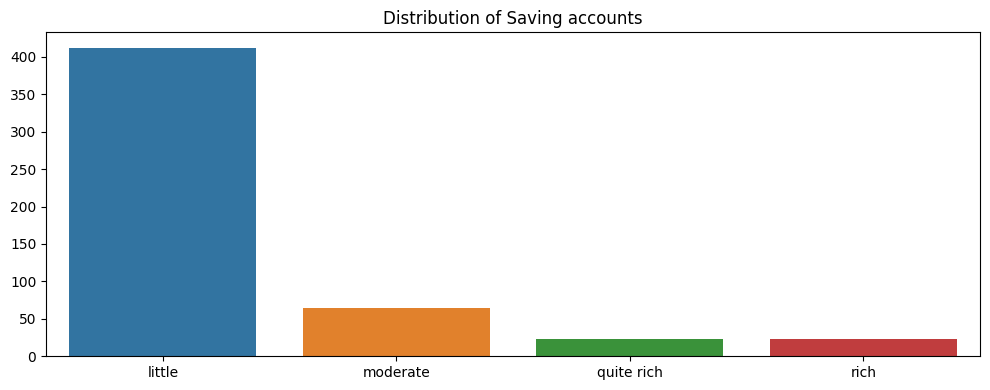

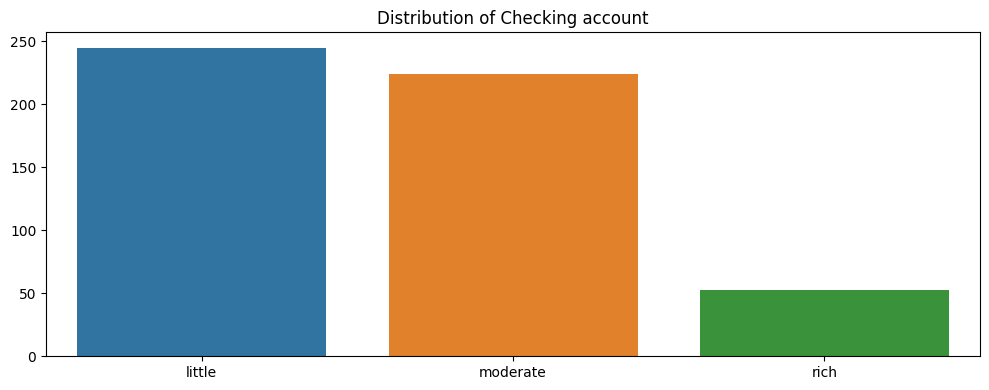

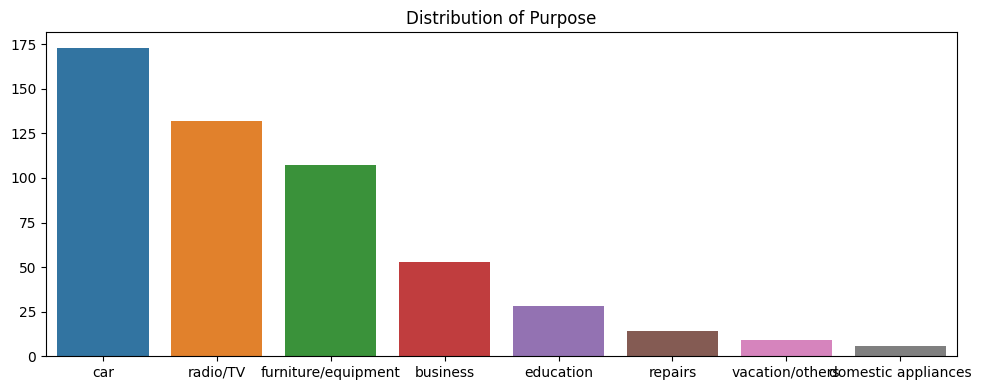

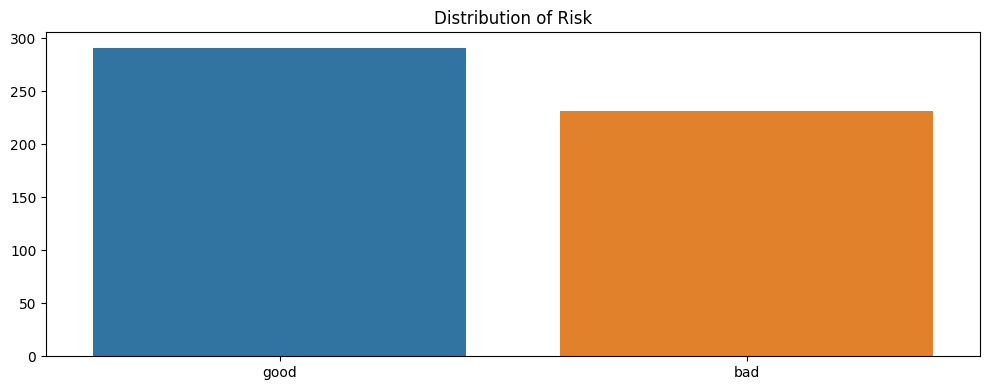

C:\Users\ALIM\AppData\Local\Temp\ipykernel_9988\4241085647.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


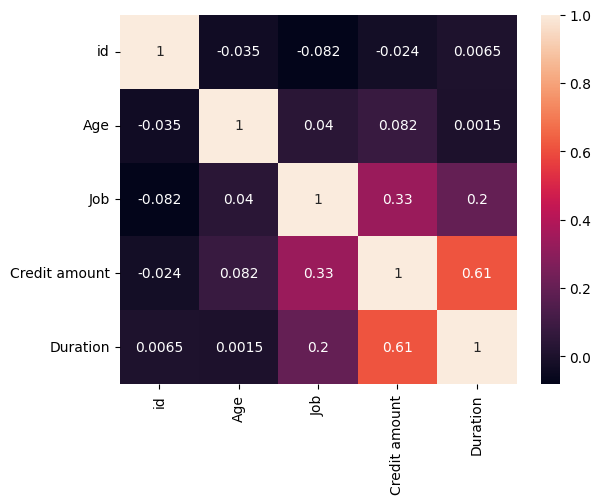

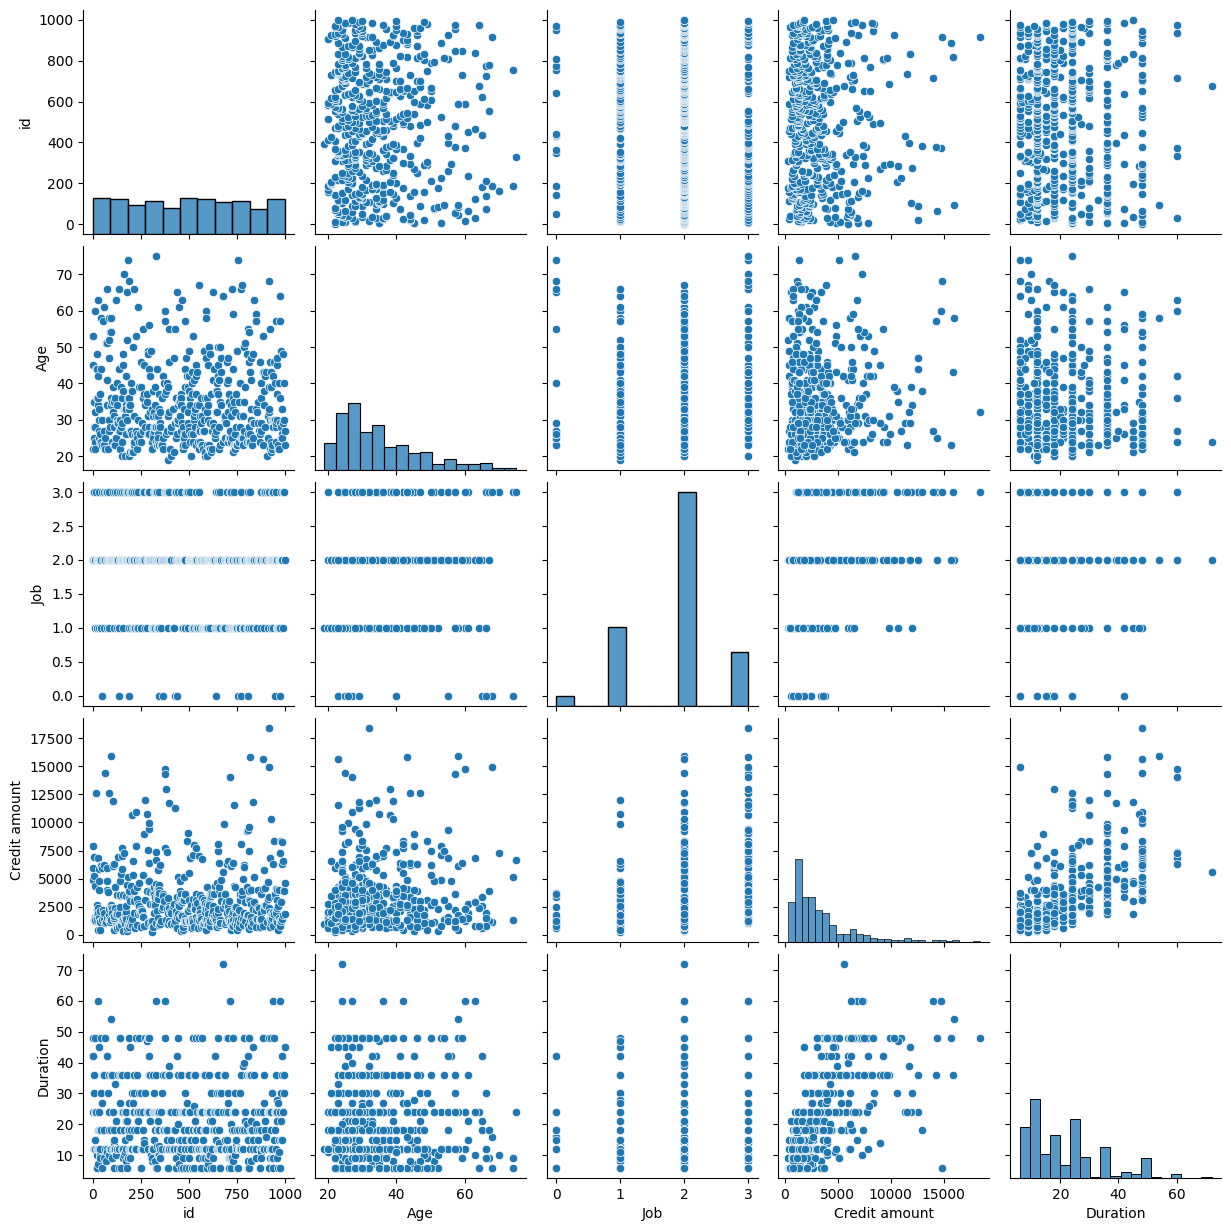

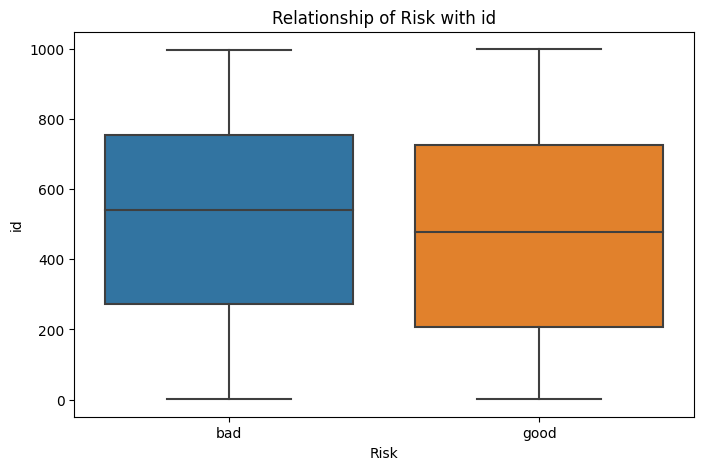

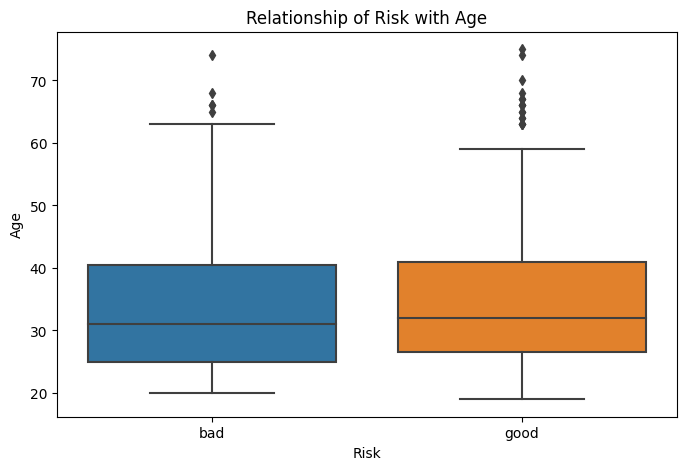

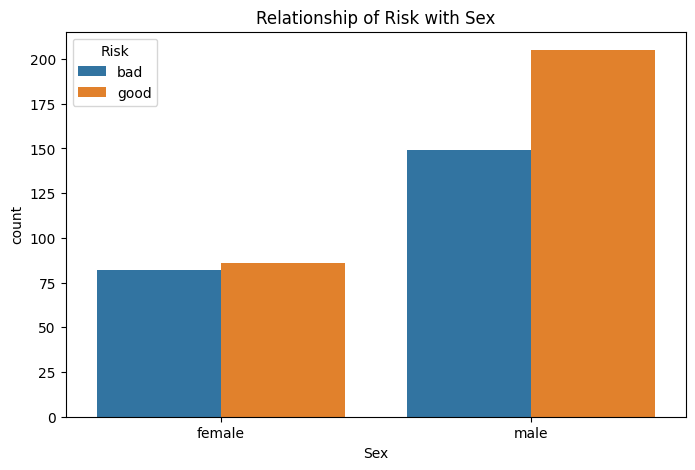

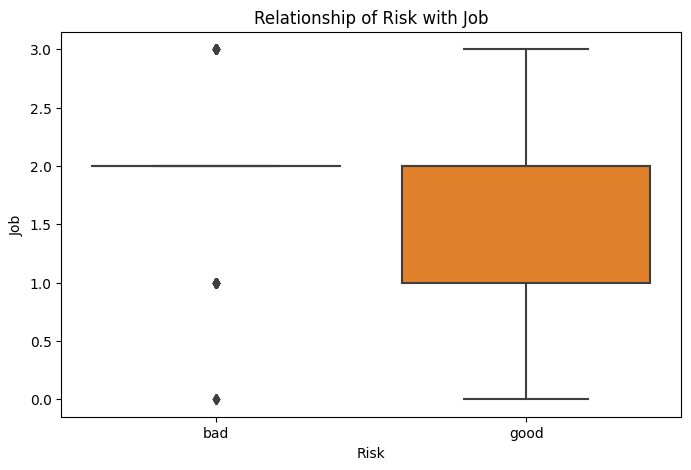

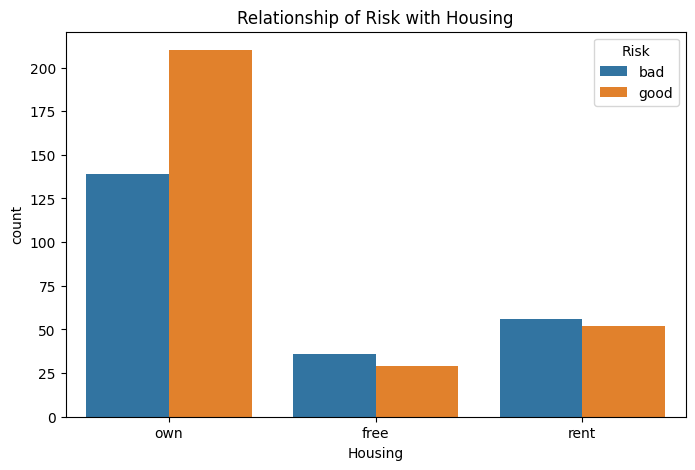

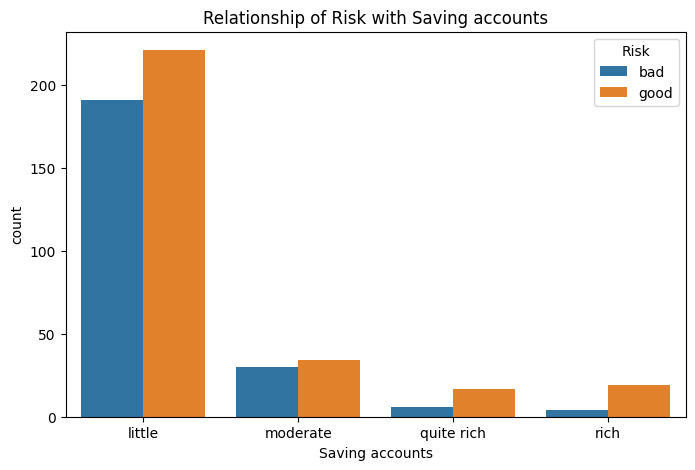

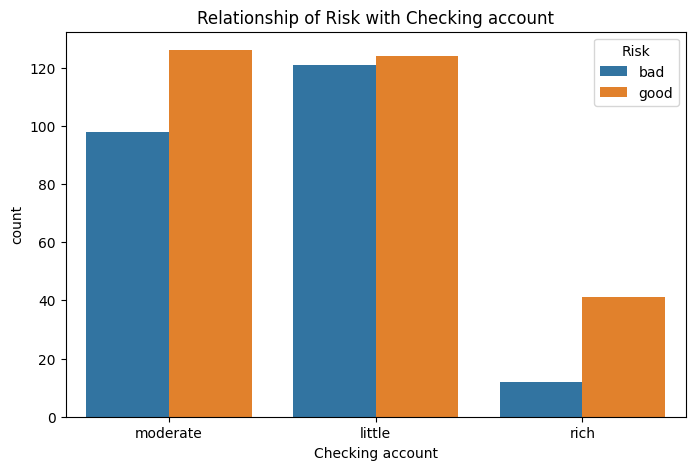

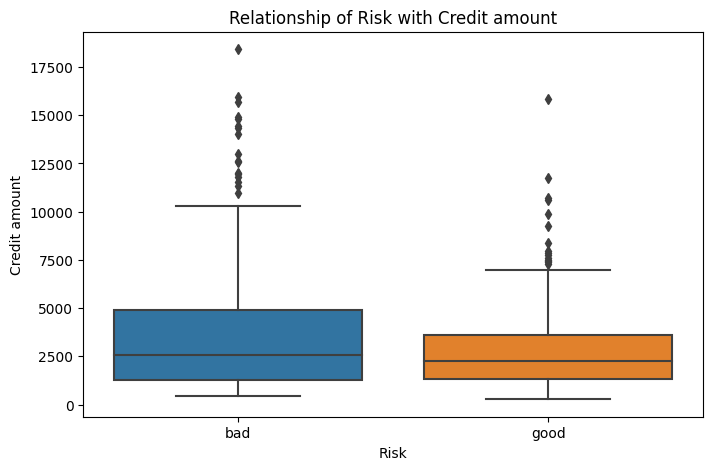

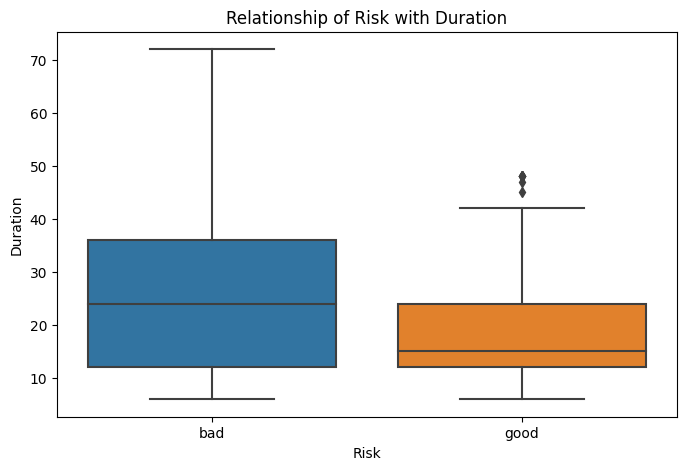

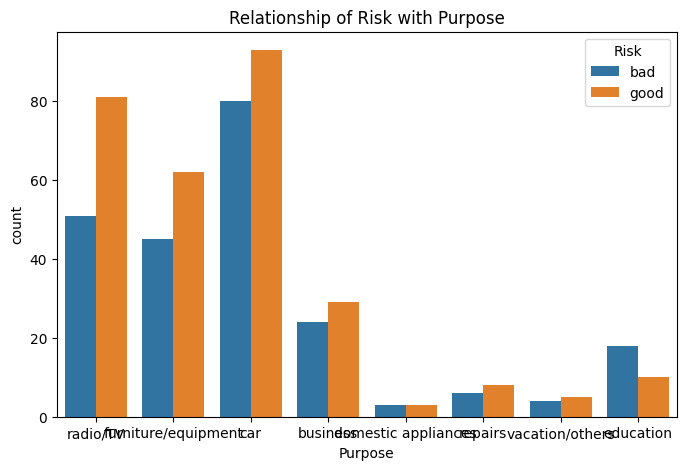

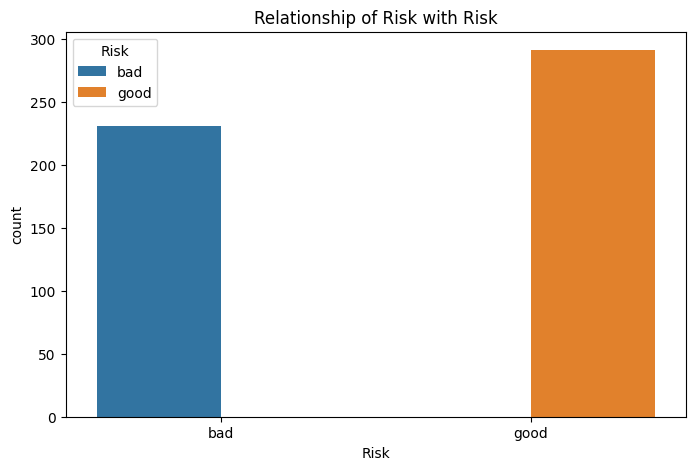

In [4]:

plt.figure(figsize=(10,7))
df[['Age', 'Credit amount', 'Duration']].boxplot()
plt.title('Box Plot for Numerical Columns')
plt.show()

# Data Distribution
df.hist(bins=30, figsize=(10,10), color='r')

# Bar plots for categorical columns
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for column in categorical_columns:
    plt.figure(figsize=(10,4))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values)
    plt.title('Distribution of ' + column)
    plt.tight_layout()
    plt.show()

# Correlation Matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

# Relationship with target variable
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(8,5))
        sns.boxplot(x='Risk', y=column, data=df)
        plt.title('Relationship of Risk with ' + column)
        plt.show()
    else:
        plt.figure(figsize=(8,5))
        sns.countplot(x=column, hue='Risk', data=df)
        plt.title('Relationship of Risk with ' + column)
        plt.show()


# STEP 2: Data Preprocessing


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Separate features and target variable
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split data into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocessing on the training, validation and test data
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

# STEP 3: MODEL TRAINING

1. kNN

In [9]:
# Import KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the validation set
y_valid_preds = knn.predict(X_valid)

# Calculate Accuracy Score
accuracy = accuracy_score(y_valid, y_valid_preds)
print(f'Validation Accuracy Score for KNN: {accuracy}')

# Adjust the n_neighbors parameter based on validation performance for final model
knn_final = KNeighborsClassifier(n_neighbors=5)

# Fit the final model on the full training data (train + valid)
X_full_train = np.concatenate((X_train, X_valid))
y_full_train = np.concatenate((y_train, y_valid))
knn_final.fit(X_full_train, y_full_train)

# Evaluate final model on test data
y_test_preds = knn_final.predict(X_test)

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_test_preds)
print(f'Test Accuracy Score for KNN: {accuracy}')



Validation Accuracy Score for KNN: 0.5428571428571428
Test Accuracy Score for KNN: 0.5904761904761905
